In [1]:
!pip install plotly

In [2]:
!pip install wordcloud


In [3]:
import pandas as pd
import numpy as np

In [4]:
#Read the CSV Files:
biden_df_new = pd.read_csv('biden_tweets_sentiment.csv')
trump_df_new = pd.read_csv('trump_tweets_sentiment.csv')

In [5]:
#Add a new column to each DataFrame to indicate the source (Trump or Biden):
biden_df_new ['source'] = 'Trump'
trump_df_new['source'] = 'Biden'

In [6]:
# Rename the timestamp column to 'created_at' for consistency if it has a different name
biden_df_new.rename(columns={'YourTimestampColumnName': 'created_at'}, inplace=True)
trump_df_new.rename(columns={'YourTimestampColumnName': 'created_at'}, inplace=True)

In [7]:
#Merge the two DataFrames into a single DataFrame. You can use the concat function from 
combined_df = pd.concat([trump_df_new, biden_df_new], ignore_index=True)

In [8]:
combined_df.head()

,created_at,tweet,likes,retweet_count,user_join_date,user_followers_count,user_location,lat,long,city,country,state,cleaned_tweet,sentiment,sentiment_numeric,source
0,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,Oregon,as a student i used to hear for years for ten...,positive,1,Biden
1,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,District of Columbia,you get a tie and you get a tie s rally,neutral,0,Biden
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,2009-02-02 23:08:28,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,Illinois,in is being by twitter to manipulate a us ...,negative,-1,Biden
3,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,Oregon,nobody likes to tell you this but some of the...,positive,1,Biden
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,2010-01-04 04:34:39,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States of America,Florida,comments on this do democrats understand how r...,neutral,0,Biden


In [9]:
# confirming the columns, try accessing 'created_at' again
print(combined_df['created_at'].head())

0    2020-10-15 00:00:02
1    2020-10-15 00:00:08
2    2020-10-15 00:00:25
3    2020-10-15 00:01:14
4    2020-10-15 00:01:23
Name: created_at, dtype: object


In [10]:
combined_df['created_at'] = pd.to_datetime(combined_df['created_at'])

In [11]:
#confirming the columns
df_copy = combined_df.copy()
print(df_copy['created_at'].dtype)

datetime64[ns]


In [12]:
sentiment_summary = combined_df.groupby('source')['sentiment'].value_counts().unstack()
print(sentiment_summary)

sentiment  negative  neutral  positive
source                                
Biden         33999    24625     33088
Trump         21338    25164     35583


In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'sentiment' column has categories like 'Positive', 'Neutral', 'Negative'
# and 'source' column distinguishes between Biden and Trump tweets
sentiment_summary = combined_df.groupby(['source', 'sentiment']).size().unstack()

# Create a figure for the bar chart
fig = go.Figure()

# Iterate over each sentiment category and add a bar for each source
for sentiment in sentiment_summary.columns:
    fig.add_trace(go.Bar(x=sentiment_summary.index, y=sentiment_summary[sentiment], name=sentiment))

# Update the layout to group bars based on sentiment
fig.update_layout(
    title_text="Sentiment Distribution Comparison",
    barmode='group',
    xaxis_title="Source",
    yaxis_title="Number of Tweets",
    legend_title="Sentiment"
)

fig.show()

# To plot the Sentiment Distribution Over Time, you would typically represent how the counts of each sentiment category (positive, negative, neutral) change over a specified time period.

In [14]:
# Calculate the start of the week (Monday) for each 'created_at' date and assign it to a new 'week_start' column
combined_df['week_start'] = combined_df['created_at'].apply(lambda x: x - pd.Timedelta(days=x.weekday()))

In [15]:
#If you want the 'week_start' column to only contain the date part (no time)
combined_df['week_start'] = combined_df['week_start'].dt.date

In [16]:
print(combined_df[['created_at', 'week_start']].head())

           created_at  week_start
0 2020-10-15 00:00:02  2020-10-12
1 2020-10-15 00:00:08  2020-10-12
2 2020-10-15 00:00:25  2020-10-12
3 2020-10-15 00:01:14  2020-10-12
4 2020-10-15 00:01:23  2020-10-12


In [17]:
# Aggregate counts of each sentiment category by 'week_start' for each source
weekly_sentiment_counts = combined_df.groupby(['week_start', 'source', 'sentiment']).size().reset_index(name='count')
weekly_sentiment_counts 

,week_start,source,sentiment,count
0,2020-10-12,Biden,negative,4341
1,2020-10-12,Biden,neutral,2678
2,2020-10-12,Biden,positive,4013
3,2020-10-12,Trump,negative,2786
4,2020-10-12,Trump,neutral,2149
5,2020-10-12,Trump,positive,3066
6,2020-10-19,Biden,negative,8840
7,2020-10-19,Biden,neutral,6069
8,2020-10-19,Biden,positive,8067
9,2020-10-19,Trump,negative,6025


In [18]:
import plotly.graph_objs as go

# Create a plotly figure
fig = go.Figure()

# Add traces for each combination of source and sentiment
for source in weekly_sentiment_counts['source'].unique():
    for sentiment in weekly_sentiment_counts['sentiment'].unique():
        df_filtered = weekly_sentiment_counts[(weekly_sentiment_counts['source'] == source) & (weekly_sentiment_counts['sentiment'] == sentiment)]
        fig.add_trace(go.Scatter(x=df_filtered['week_start'], y=df_filtered['count'], mode='lines+markers', name=f'{source} - {sentiment}'))

# Update figure layout
fig.update_layout(title='Tweet Counts by Week Start, Source, and Sentiment',
                  xaxis_title='Week Starting',
                  yaxis_title='Tweet Count',
                  legend_title='Source and Sentiment')
fig.show()



In [19]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Identify unique weeks, sources, and sentiments for plotting
weeks = sorted(weekly_sentiment_counts['week_start'].unique())
sources = weekly_sentiment_counts['source'].unique()
sentiments = weekly_sentiment_counts['sentiment'].unique()

# Create a subplot figure with one row and as many columns as there are sentiments
fig = make_subplots(rows=1, cols=len(sentiments), subplot_titles=sentiments)

# Loop through each sentiment to create a separate bar chart for each subplot
for i, sentiment in enumerate(sentiments, start=1):
    for source in sources:
        df_filtered = weekly_sentiment_counts[(weekly_sentiment_counts['source'] == source) & (weekly_sentiment_counts['sentiment'] == sentiment)]
        fig.add_trace(
            go.Bar(x=df_filtered['week_start'], y=df_filtered['count'], name=source),
            row=1, col=i
        )

# Update layout to adjust for better visualization
fig.update_layout(
    title_text='Weekly Tweet Counts by Source and Sentiment',
    xaxis_title='Week Starting',
    yaxis_title='Tweet Count',
    barmode='group', # This groups bars of the same week_start together for easy comparison
    legend_title='Source'
)

fig.show()


"This graph shows the Combined Weekly Sentiment Distribution for Biden and Trump."

Objective:"Our aim was to compare public sentiment on social media regarding these two political figures over a specific time period."

Highlight Key Trends and Observations: Comparative Analysis: "Let's compare the sentiment trends for both candidates. For instance, we can see spikes in negative sentiment for Trump on [specific dates], possibly correlating with [specific events]." Overall Trends: "Overall, Biden's [positive/negative/neutral] sentiment appears to [have certain characteristics], whereas Trump's sentiment shows [different characteristics]

this analysis reveals significant differences/variations in public sentiment towards these two individuals during the observed period.

In [20]:
print(combined_df.columns)


Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_join_date',
       'user_followers_count', 'user_location', 'lat', 'long', 'city',
       'country', 'state', 'cleaned_tweet', 'sentiment', 'sentiment_numeric',
       'source', 'week_start'],
      dtype='object')


In [21]:
# Assuming you have two DataFrames trump_df and biden_df with a column 'cleaned_tweet'
trump_text = ' '.join(biden_df_new ['cleaned_tweet'].dropna().tolist())
biden_text = ' '.join(trump_df_new ['cleaned_tweet'].dropna().tolist())

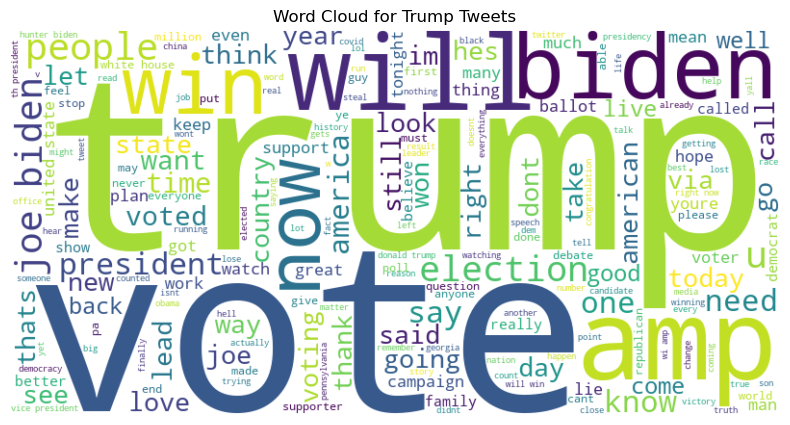

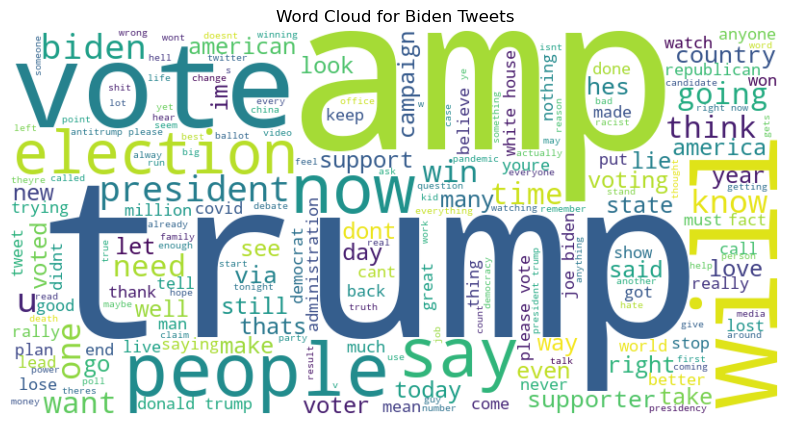

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word cloud for Trump
generate_wordcloud(trump_text, 'Word Cloud for Trump Tweets')

# Generate word cloud for Biden
generate_wordcloud(biden_text, 'Word Cloud for Biden Tweets')


# Performing Correlation Analysis

In [23]:
# Selecting the numerical columns for correlation analysis
numerical_columns = ['likes', 'retweet_count', 'user_followers_count', 'sentiment_numeric']

# Calculating the correlation matrix
correlation_matrix = combined_df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                         likes  retweet_count  user_followers_count  \
likes                 1.000000       0.886627              0.168511   
retweet_count         0.886627       1.000000              0.178924   
user_followers_count  0.168511       0.178924              1.000000   
sentiment_numeric     0.001745      -0.000156             -0.007480   

                      sentiment_numeric  
likes                          0.001745  
retweet_count                 -0.000156  
user_followers_count          -0.007480  
sentiment_numeric              1.000000  


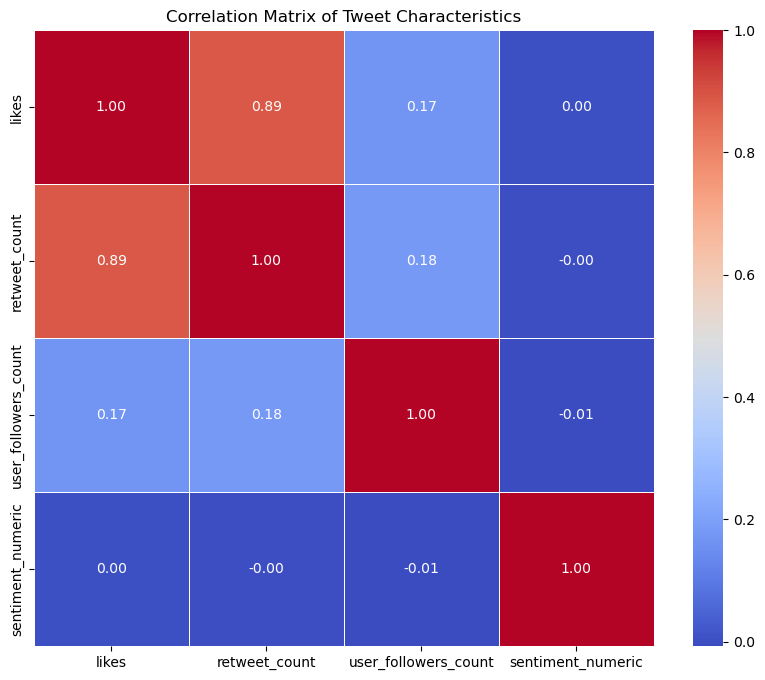

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Tweet Characteristics')
plt.show()


A positive correlation between likes and retweet_count would suggest that tweets that are liked more also tend to be retweeted more, which is intuitive.
The correlation between user_followers_count and engagement metrics (likes, retweet_count) can indicate whether users with more followers tend to receive more engagement.
The correlation between sentiment_numeric and other variables like likes or retweet_count can show if there's a tendency for positive or negative sentiments to receive more engagement.

# Aggregating data by location, sentiment, or other metrics can provide valuable insights into the spatial distribution and intensity of sentiments or engagement metrics across different regions. This aggregated information can help identify trends, hotspots of activity, or sentiment, and give context to the geographical visualization of your data

In [25]:
# Assuming 'city', 'lat', and 'long' are columns in your DataFrame
city_aggregated_data = combined_df.groupby('city').agg(
    average_sentiment=('sentiment_numeric', 'mean'),
    total_likes=('likes', 'sum'),
    total_retweets=('retweet_count', 'sum'),
    tweet_count=('tweet', 'count'),
    lat=('lat', 'first'),  # Assuming all rows of the same city have the same lat/long values
    long=('long', 'first')
).reset_index()



In [31]:
color_continuous_scale=px.colors.sequential.Viridis  # or any other color scale



# Tweet Volume by city

In [33]:
import plotly.express as px

# Ensuring data compatibility
# Make sure 'lat' and 'long' columns are numeric and not missing any values
city_aggregated_data.dropna(subset=['lat', 'long'], inplace=True)

# Basic color-coded scatter plot without sizing
fig = px.scatter_geo(city_aggregated_data,
                     lat='lat',
                     lon='long',
                     color='average_sentiment',  # Ensure this column exists and is numeric
                     hover_name='city',  # Show city name on hover
                     hover_data=['average_sentiment'],
                     title="Geographical Distribution of Tweets by City",
                     scope='usa',  # or remove for a global view
                     color_continuous_scale=px.colors.sequential.Viridis)  # A vibrant, sequential color scale

fig.show()




Emphasize the benefits of visualizing data at the city level, such as identifying localized trends and understanding the diversity of sentiments within the country.